# Time Series: Autocorrelation and Stationarity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline 

In [2]:
df = pd.read_csv('Apple.csv', index_col=0)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016/1/4,26.342501,25.500000,25.652500,26.337500,270597600,24.151495
2016/1/5,26.462500,25.602501,26.437500,25.677500,223164000,23.546278
2016/1/6,25.592501,24.967501,25.139999,25.174999,273829600,23.085484
2016/1/7,25.032499,24.107500,24.670000,24.112499,324377600,22.111164
2016/1/8,24.777500,24.190001,24.637501,24.240000,283192000,22.228088
...,...,...,...,...,...,...
2022/6/24,141.910004,139.770004,139.899994,141.660004,89116800,141.463501
2022/6/27,143.490005,140.970001,142.699997,141.660004,70207900,141.463501
2022/6/28,143.419998,137.320007,142.130005,137.440002,67083400,137.249359


In [3]:
df_close = df['Close']
df_close

Date
2016/1/4      26.337500
2016/1/5      25.677500
2016/1/6      25.174999
2016/1/7      24.112499
2016/1/8      24.240000
                ...    
2022/6/24    141.660004
2022/6/27    141.660004
2022/6/28    137.440002
2022/6/29    139.229996
2022/6/30    136.720001
Name: Close, Length: 1635, dtype: float64

### Calculate ACF & PACF and Visualize them

In [4]:
import statsmodels.tsa.api as smt
#tsa: Time Series analysis

In [5]:
# Calculate ACF, set the lag term as 5, 
# And the default lag term is 40
acf = smt.stattools.acf(df_close, nlags=5)
print(f'ACF : {acf}')

ACF : [1.         0.99844861 0.99692616 0.99544057 0.99390894 0.99231921]


In [6]:
# Calculate PACF
pacf = smt.stattools.pacf(df_close, nlags=5)
print(f'PACF : {pacf}')

PACF : [ 1.          0.99905965  0.01433413  0.01881149 -0.02500359 -0.03247666]


D:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


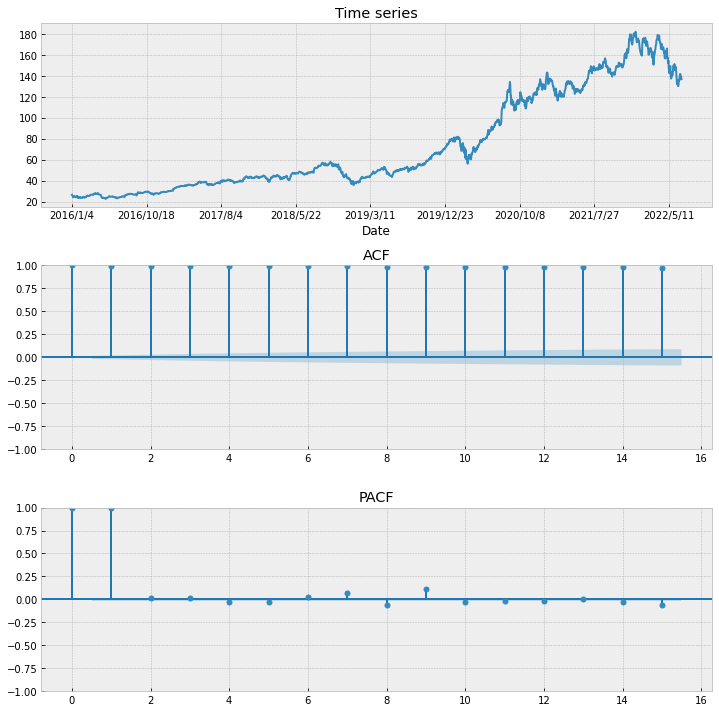

In [7]:
def acf_pacf_plot(data, lags=None):
    # Check whether the data is pandas in Series format
    if not isinstance(data, pd.Series):   
        data = pd.Series(data)
    
    # plot setting
    with plt.style.context('bmh'):    
        fig = plt.figure(figsize=(10, 10))
        
        layout = (3,1)
        ts_ax = plt.subplot2grid(layout, (0, 0))
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (2, 0))
        data.plot(ax = ts_ax)
        ts_ax.set_title('Time series')
        smt.graphics.plot_acf(data, lags=lags, ax=acf_ax, alpha=0.5)
        acf_ax.set_title('ACF')
        smt.graphics.plot_pacf(data, lags=lags, ax=pacf_ax, alpha=0.5)
        pacf_ax.set_title('PACF')
        plt.tight_layout()
    return

# Set lags as 20
acf_pacf_plot(df_close,lags=15)

## Simulate white noise and stationarity test

In [8]:
import scipy.stats as scs
import statsmodels.api as sm

In [24]:
def ts_plot(data, lags=None,title=''):
    if not isinstance(data, pd.Series):   
        data = pd.Series(data)
    with plt.style.context('bmh'):    
        fig = plt.figure(figsize=(10, 8))
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0))
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))

        data.plot(ax=ts_ax)
        ts_ax.set_title(title + ' Time Series')
        smt.graphics.plot_acf(data, lags=lags, ax=acf_ax, alpha=0.5)
        acf_ax.set_title('ACF')
        smt.graphics.plot_pacf(data, lags=lags, ax=pacf_ax, alpha=0.5)
        pacf_ax.set_title('PACF')
        sm.qqplot(data, line='s', ax=qq_ax)
        qq_ax.set_title('QQ plot')        
        scs.probplot(data, sparams=(data.mean(), data.std()), plot=pp_ax)
        pp_ax.set_title('PP plot') 
        plt.tight_layout()
    return


# The results between QQ plot and PP plot are quite similar
# PP plot: using the `cumulative ratio of the distribution`
# QQ plot: using the `quantiles of the distribution`
# As in the P-P plot, if the data are normally distributed, 
# In the Q-Q normal distribution plot, the data should be basically on the diagonal of the plot

### Simulate white noise process

D:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


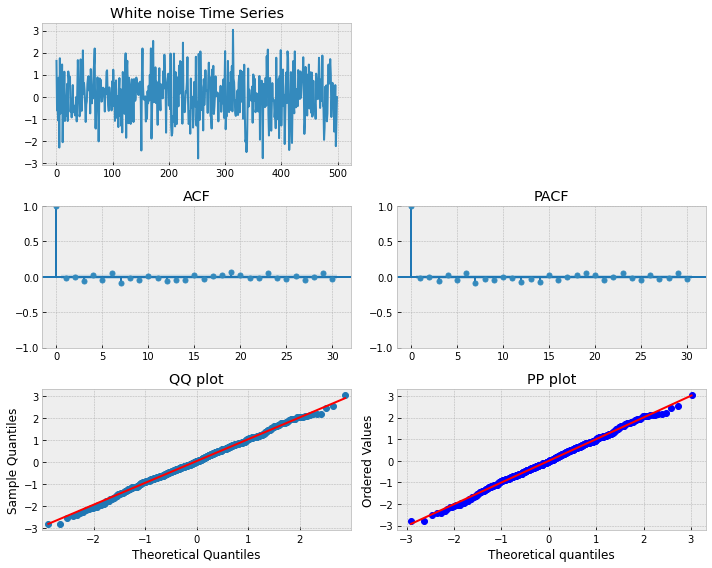

In [25]:
# Simple simulation of white noise processes using numpy
np.random.seed(1)

# plot of discrete white noise
randser = np.random.normal(size=500)
ts_plot(randser, lags=30,title='White noise')

- It can be seen that the process is stochastic and fluctuates around zero. ACF and PACF showed no significant serial correlation. 

- Since it is the result of normally distributed sampling, we should see a significance level about 5% in the autocorrelogram. 

- At the bottom, the QQ plot and the probability plot compare the probability distribution of the data with the distribution of other theories. Here, the theoretical distribution is the standard normal distribution, so our data are normally distributed and conform to Gaussian white noise. 

### Simulate random walk process

- Random walk: random walk is time series ${𝑥_𝑡}$ model: ${𝑥_𝑡} = {𝑥_{𝑡-1}} + {𝑤_𝑡}$, ${𝑤_𝑡}$ is discrete white noise sequence. The random walk is not stationary because the covariance is time dependent. If the time series we model is a random walk, then it is unpredictable.

D:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


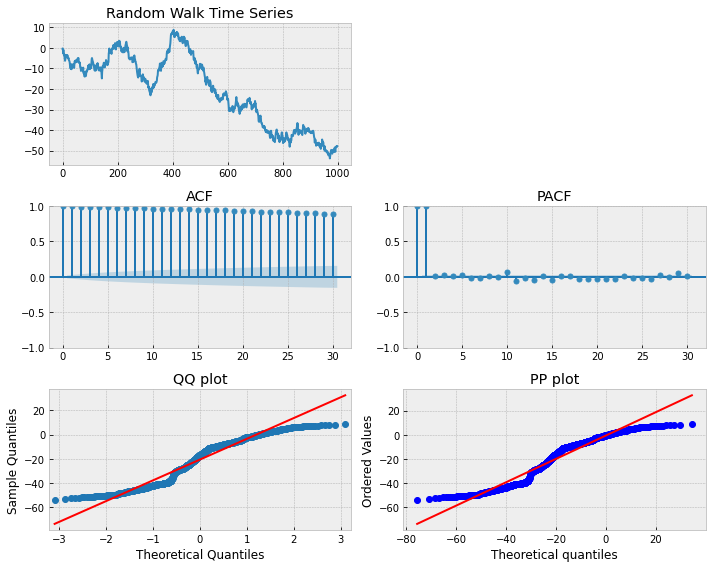

In [26]:
# Simulate a random walk by sampling from a standard normal distribution

np.random.seed(2)
n_samples = 1000
x = w = np.random.normal(size=n_samples)

for t in range(1,n_samples):   
    x[t] = x[t-1] + w[t]
    
    
ts_plot(x, lags=30,title='Random Walk')

- Obviously, the series is not stationary. The random walk model is ${𝑥_𝑡} = {𝑥_{𝑡-1}} + {𝑤_𝑡}$, ${𝑤_𝑡}$, transpose can get ${𝑥_𝑡} - {𝑥_{𝑡-1}} = {𝑤_𝑡}$ . Therefore, the first difference of the random walk should be equal to the white noise, and we can use the `np.diff()` function for the time series to see if it holds.

D:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


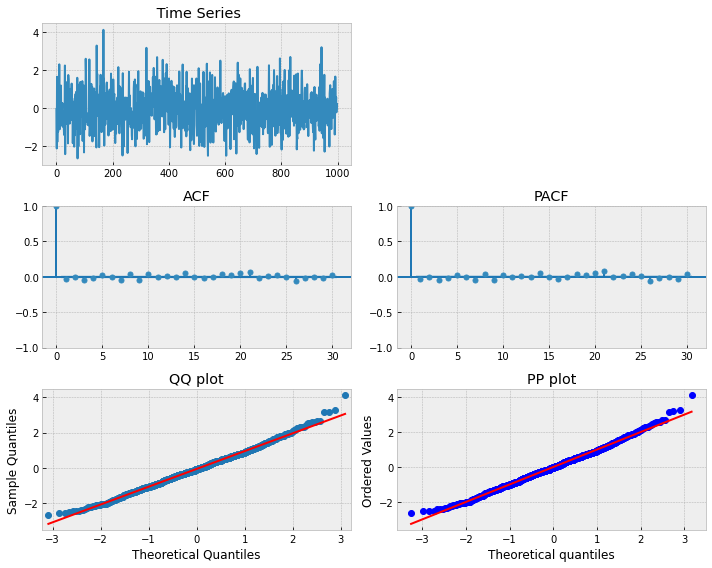

In [27]:
# First difference of simulated Random Walk series
ts_plot(np.diff(x), lags=30)

### Case: The data of Apple in recent five years are analyzed by stationarity test

In [28]:
apple = pd.DataFrame(df, columns=['Close'])
apple

,Close
Date,
2016/1/4,26.337500
2016/1/5,25.677500
2016/1/6,25.174999
2016/1/7,24.112499
2016/1/8,24.240000
...,...
2022/6/24,141.660004
2022/6/27,141.660004
2022/6/28,137.440002


In [29]:
# Return
apple['return'] = apple.Close / apple.Close.shift(1) - 1

# Log_return
apple['log_return'] = np.log(apple.Close/apple.Close.shift(1))

apple = apple.dropna()

In [30]:
apple

,Close,return,log_return
Date,,,
2016/1/5,25.677500,-0.025059,-0.025379
2016/1/6,25.174999,-0.019570,-0.019764
2016/1/7,24.112499,-0.042205,-0.043121
2016/1/8,24.240000,0.005288,0.005274
2016/1/11,24.632500,0.016192,0.016063
...,...,...,...
2022/6/24,141.660004,0.024517,0.024222
2022/6/27,141.660004,0.000000,0.000000
2022/6/28,137.440002,-0.029790,-0.030242


D:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


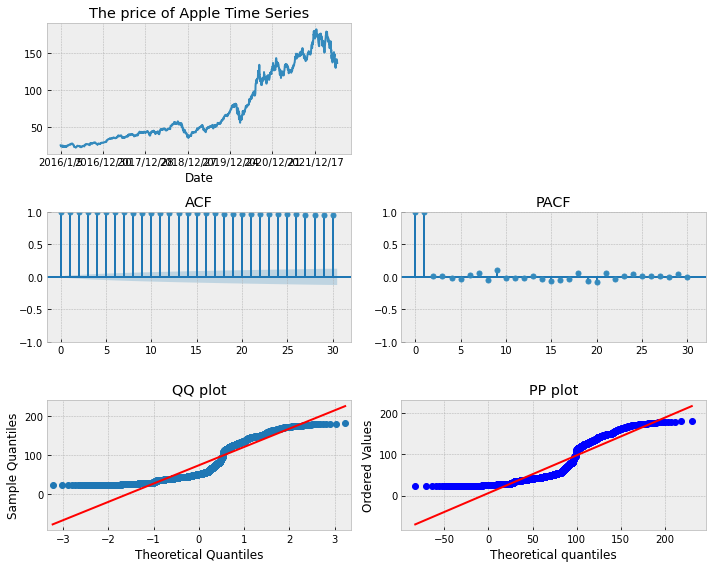

In [31]:
ts_plot(apple.Close, lags=30, title='The price of Apple')

D:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


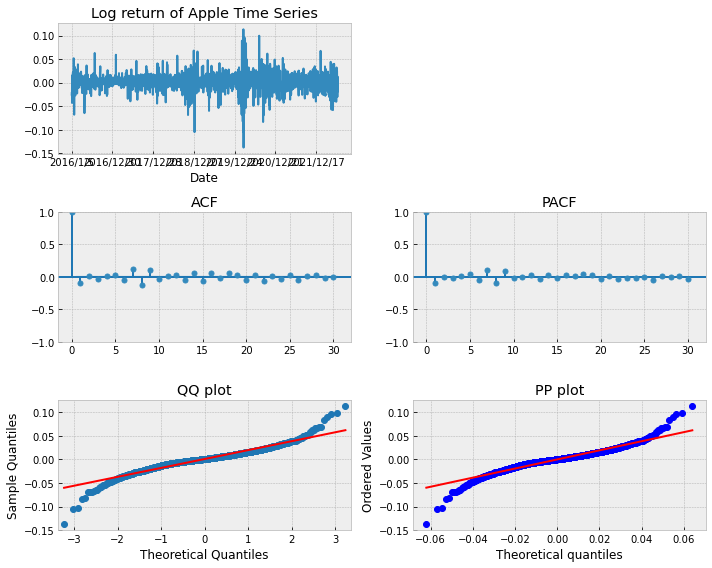

In [32]:
ts_plot(apple.log_return, lags=30, title='Log return of Apple')

### ADF unit root test

In [40]:
import statsmodels.tsa.api as smt

smt.adfuller(apple.Close)

(-0.4414785675480835,
 0.9029396084194565,
 11,
 1622,
 {'1%': -3.4343880265995215,
  '5%': -2.8633235546096194,
  '10%': -2.56771952639493},
 6343.281372075631)

In [43]:
# Import adfuller from the stattools statistical tool of the Time Series analysis ('tsa') submodule
# Same result as above
from statsmodels.tsa.stattools import adfuller

adfuller(apple.Close)

In [45]:
from arch.unitroot import ADF

ADF(apple.Close)

Test Statistic,-0.441
P-value,0.903
Lags,11


In [46]:
ADF(apple.log_return)

Test Statistic,-12.648
P-value,0.000
Lags,8
